<a href="https://colab.research.google.com/github/ayten21/python-libraries/blob/main/Visualization_With_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---

<center><h1>Seaborn </h1></center>

---

- Seaborn is a Python data visualization library based on matplotlib.
- It provides a high-level interface for drawing attractive and informative statistical graphics. It provide choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.
- The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

---

### `Table of Contents`

1. Creating basic plots
    - Line Chart
    - Bar Chart
    - Histogram
    - Box plot
    - Violin plot
    - Scatter plot
    - Hue semantic
    - Bubble plot
    - Pie Chart
2. Advance Categorical plots in Seaborn
3. Density plots
4. Pair plots

---

In [1]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the dataset
dataset = pd.read_csv('sales_data.csv')
# drop the null values
dataset = dataset.dropna(how="any")
# multiply Item_Visibility by 100 to increase size
dataset["Visibility_Scaled"] = dataset["Item_Visibility"] * 100
# view the top results
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Scaled
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.000000


---

## 1. `Creating basic plots`

Let's have a look on how can you create some basic plots in seaborn in a single line for which multiple lines were required in matplotlib.

#### Line Chart

 * With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable.
 * In seaborn, this can be accomplished by the **lineplot()** function, either directly or with **relplot()** by setting **kind="line":**
 
---

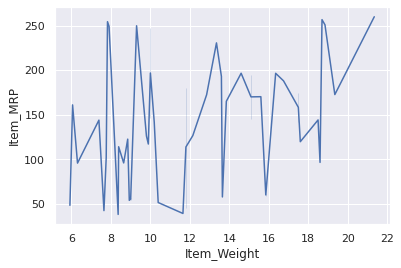

In [3]:
# line plot using relplot
sns.lineplot(x="Item_Weight", y="Item_MRP",data=dataset[:50]);

---

#### `Bar Chart`

- In seaborn, you can create a barchart by simply using the **barplot** function.
- Notice that to achieve the same thing in matplotlib, we had to write extra code just to group the data category wise.
- And then we had to write much more code to make sure that the plot comes out correct.

---

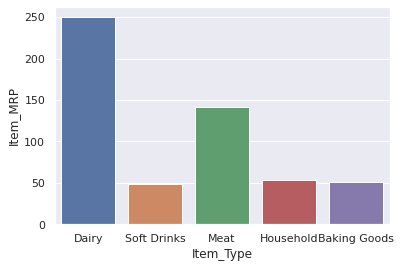

In [4]:
sns.barplot(x="Item_Type", y="Item_MRP", data=dataset[:5])

---

#### `Histogram`

- You can create a histogram in seaborn by simply using the **distplot()**. There are multiple options that we can use which we will see further in the notebook.

---

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


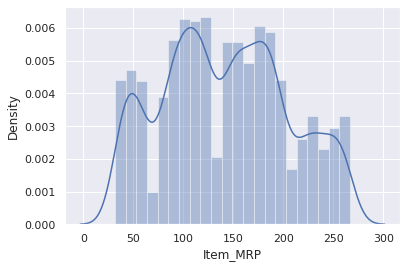

In [5]:
sns.distplot(dataset['Item_MRP'])

---

#### `Box plots`

- You can use the **boxplot()** for creating boxplots in seaborn.
- Let's try to visualize the distribution of Item_Outlet_Sales of items.

---

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


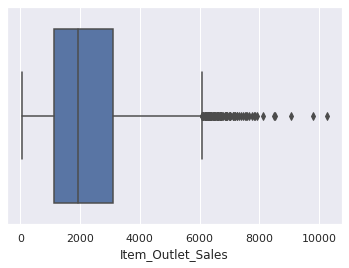

In [6]:
sns.boxplot(dataset['Item_Outlet_Sales'], orient='vertical')

---

#### `Violin plot`

- A violin plot plays a similar role as a box and whisker plot. 
- It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. 
- Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
- You can create a violinplot using the **violinplot()** in seaborn.

---

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


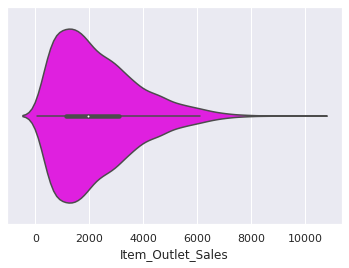

In [7]:
sns.violinplot(dataset['Item_Outlet_Sales'], orient='vertical', color='magenta')

---

#### `Scatter plot`

* It depicts the distribution of two variables using a cloud of points, where each point represents an observation in the dataset. 
* This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.
- You can use **relplot()** with the option of `kind=scatter` to plot a scatter plot in seaborn.

***NOTE : Here, we are going to use only a subset of the data for the plots.***

---

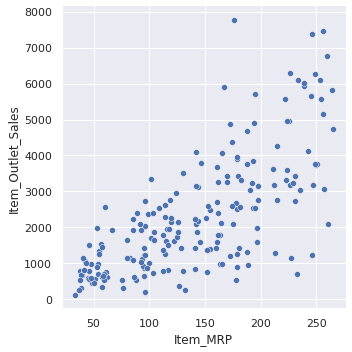

In [8]:
# scatter plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=dataset[:200], kind="scatter");

#### Hue semantic

*We can also add another dimension to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”.*

---

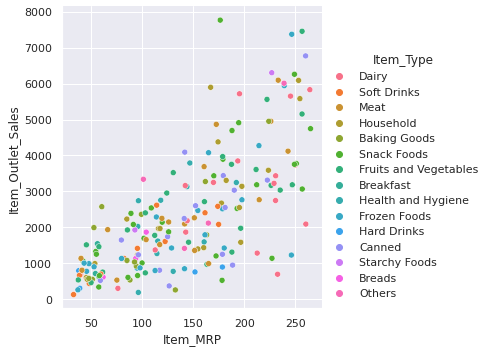

In [9]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type",data=dataset[:200]);

---

- Remember the **line chart** that we created earlier? When we use **hue** semantic, we can create more complex line plots in seaborn. 
- In the following example, **different line plots for different categories of the Outlet_Size** are made.

---

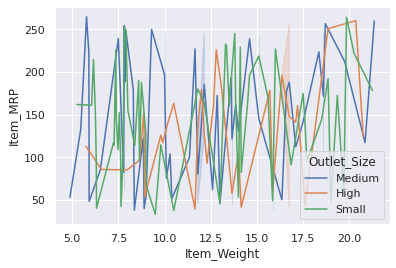

In [10]:
# different line plots for different categories of the Outlet_Size
sns.lineplot(x="Item_Weight", y="Item_MRP",hue='Outlet_Size',data=dataset[:150]);

---

#### `Bubble plot`

- We utilize the **hue** semantic to color bubbles by their Item_Visibility and at the same time use it as size of individual bubbles.

---

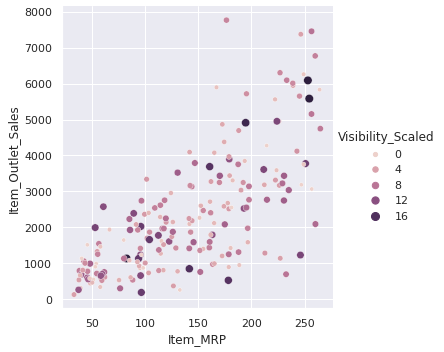

In [11]:
# bubble plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=dataset[:200], kind="scatter", size="Visibility_Scaled", hue="Visibility_Scaled");

---

#### Category wise sub plot

- You can also create **plots based on category** in seaborn.
- We have created scatter plots for each Outlet_Size

---

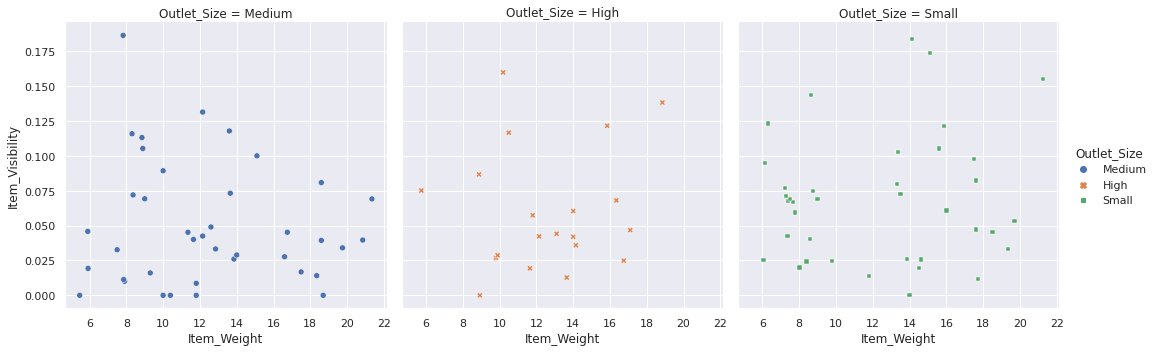

In [12]:
# subplots for each of the category of Outlet_Size
sns.relplot(x="Item_Weight", y="Item_Visibility",hue='Outlet_Size',style='Outlet_Size',col='Outlet_Size',data=dataset[:100]);

---

## 2. `Advance categorical plots in seaborn`

---

For categorical variables we have three different families in seaborn.

* **Categorical scatterplots:**

 * stripplot() (with kind="strip"; the default)
 * swarmplot() (with kind="swarm")

* **Categorical distribution plots:**

 * boxplot() (with kind="box")
 * violinplot() (with kind="violin")
 * boxenplot() (with kind="boxen")

* **Categorical estimate plots:**

 * pointplot() (with kind="point")
 * barplot() (with kind="bar")
 
---

**The default representation of the data in catplot() uses a scatterplot.**

### a. `Categorical scatterplots`

#### Strip plot
- Draws a scatterplot where one variable is categorical.
- You can create this by passing **kind=strip** in the `catplot()`.

---

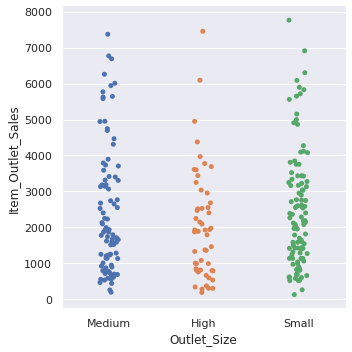

In [13]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='strip',data=dataset[:250]);

---

#### `Swarm plot`
- This function is similar to `stripplot()`, but the points are adjusted (only along the categorical axis) so that they don’t overlap. 
- This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a “beeswarm”.
- You can create this by passing **kind=swarm** in the `catplot()`.

---

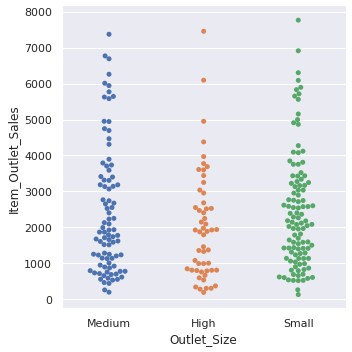

In [14]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='swarm',data=dataset[:250]);

---

### b. `Categorical distribution plots`

#### `Box Plots`

 * Box plot shows the three quartile values of the distribution along with extreme values. 
 * The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 
 * This means that each value in the boxplot corresponds to an actual observation in the data.
 
--- 

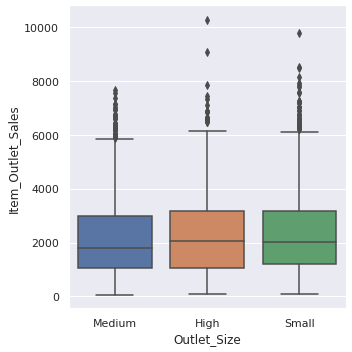

In [15]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="box",data=dataset);

---

#### `Violin Plots`

---

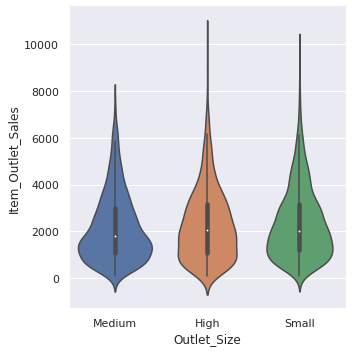

In [16]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="violin",data=dataset);

---

#### `Boxen plots`

- This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”.
- It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. 
- By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. 

---

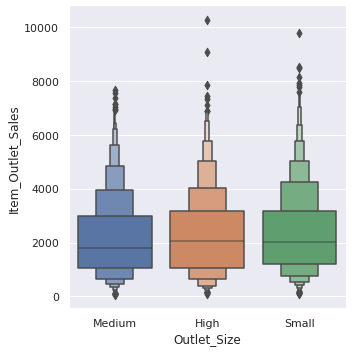

In [17]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="boxen",data=dataset);

---

#### `Point plot`

---

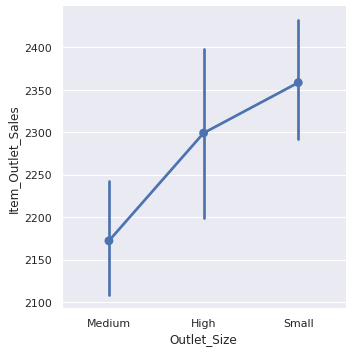

In [18]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="point",data=dataset);

---

#### `Bar plots`

---

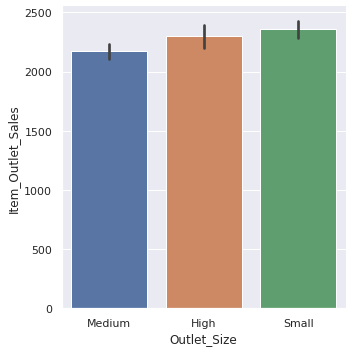

In [19]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="bar",data=dataset);

---

## 3. `Density Plots`

***Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot:***

---

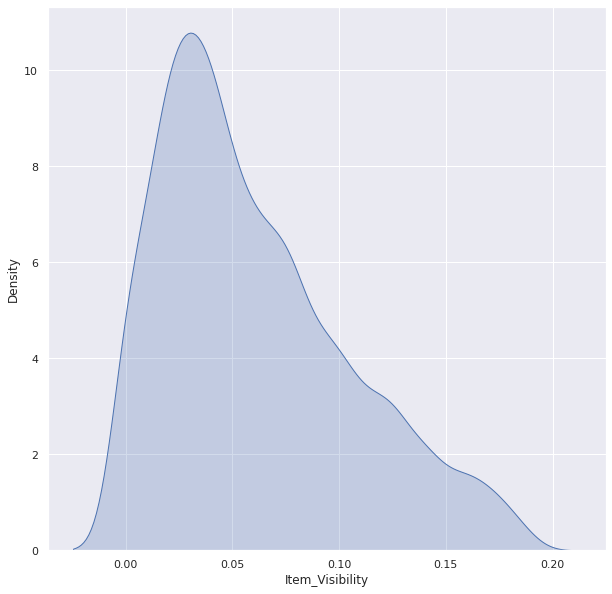

In [20]:
# distribution of Item Visibility
plt.figure(figsize=(10,10))
sns.kdeplot(dataset['Item_Visibility'], shade=True);

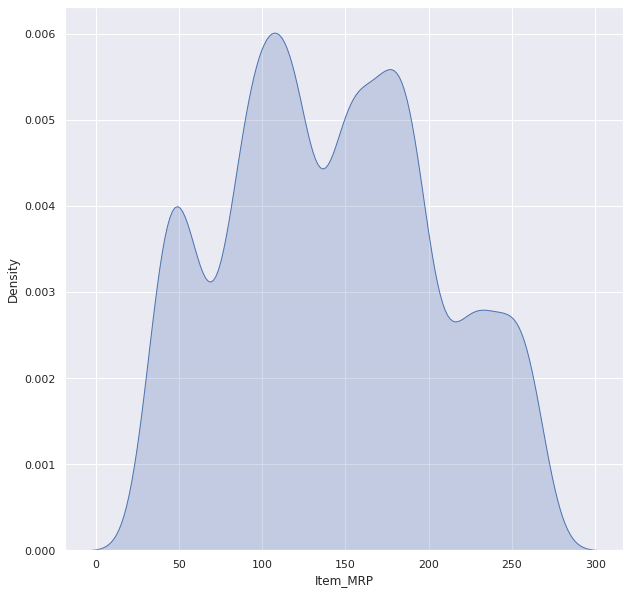

In [21]:
# distribution of Item MRP
plt.figure(figsize=(10,10))
sns.kdeplot(dataset['Item_MRP'], shade=True);

---

### `Histogram and Density Plot`

***Histograms and KDE can be combined using distplot:***

---

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


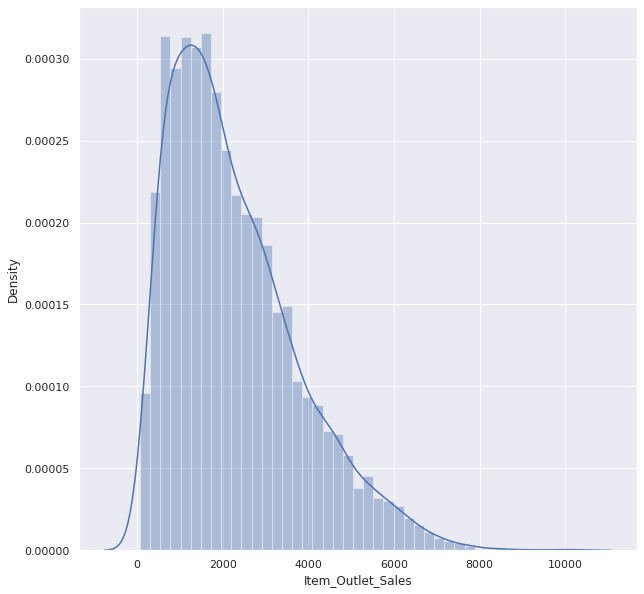

In [22]:
plt.figure(figsize=(10,10))
sns.distplot(dataset['Item_Outlet_Sales']);

---

## 4. `Pair plots`

* When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

* We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

---

In [23]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


***Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot:***

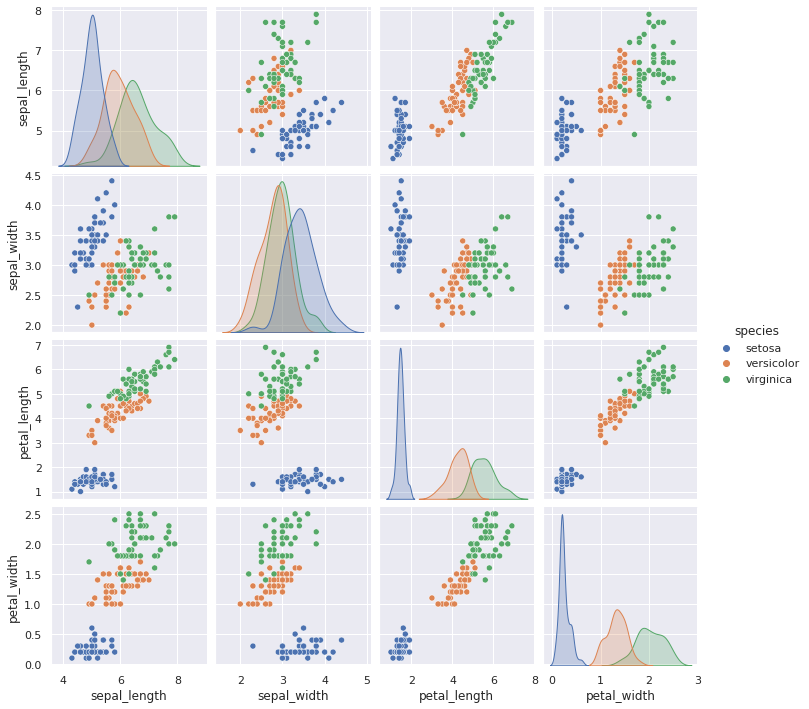

In [24]:
sns.pairplot(iris, hue='species', height=2.5);